In [71]:
#package import

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#create dataframe

df = pd.read_csv('Advertising.csv',index_col=0)

In [8]:
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [9]:
df.tail(10)

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [36]:
#data visualization

data = df[['TV','sales']]

#input - feature (X)
X = data['TV']

#output (y)
y = data['sales']

In [14]:
type(X)

pandas.core.series.Series

In [15]:
type(y)

pandas.core.series.Series

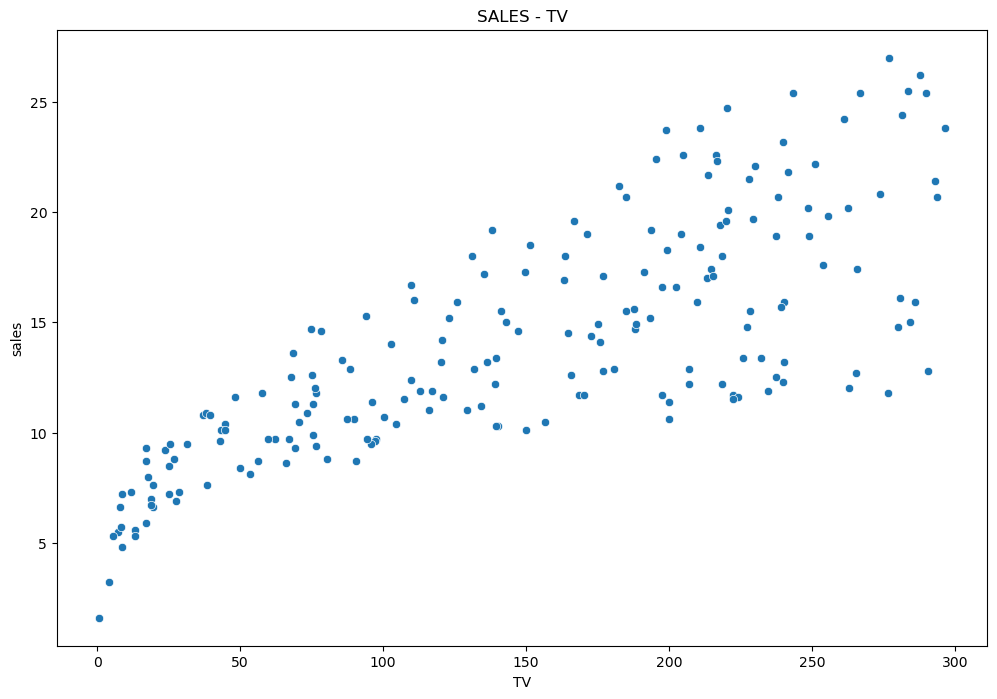

In [34]:
#draw grafic

plt.figure(figsize=(12,8))

sns.scatterplot(data=data, x='TV',y='sales')

plt.title('SALES - TV')
plt.show()

In [32]:
#creating model

from sklearn.linear_model import LinearRegression

In [33]:
l = LinearRegression()

In [37]:
#reshape X

X = X.values.reshape(-1,1)

In [38]:
X.shape

(200, 1)

In [39]:
#reshape y

y = y.values.reshape(-1,1)

In [40]:
y.shape

(200, 1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#fit = traning(X_train,y_train)
#predict = test(X_test,y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [45]:
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (140, 1)
y_train size: (140, 1)
X_test size: (60, 1)
y_test size: (60, 1)


In [46]:
l.fit(X_train,y_train)

LinearRegression()

In [47]:
#intercept beta0

print(l.intercept_)


[6.98966586]


In [48]:
#slope coefficient beta1

print(l.coef_)

[[0.04649736]]


In [49]:
#predict

In [51]:
y_pred = l.predict(X_test)

In [52]:
y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [53]:
y_pred.shape

(60, 1)

In [54]:
y_test.shape

(60, 1)

In [55]:
#draw real and predict data
#true label y_test
#predict label y_pred
#input X_test

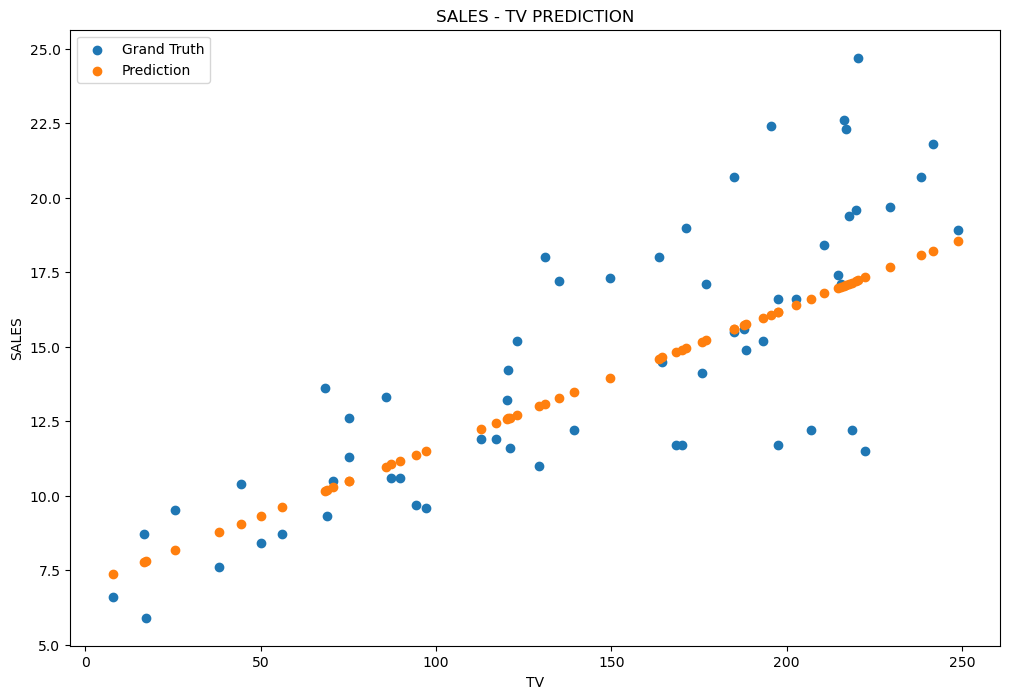

In [65]:
#Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test,y_test,label='Grand Truth')

#Prediction
ax.scatter(X_test,y_pred,label='Prediction')

plt.title('SALES - TV PREDICTION')
plt.xlabel('TV')
plt.ylabel('SALES')
plt.legend(loc='upper left')
plt.show()

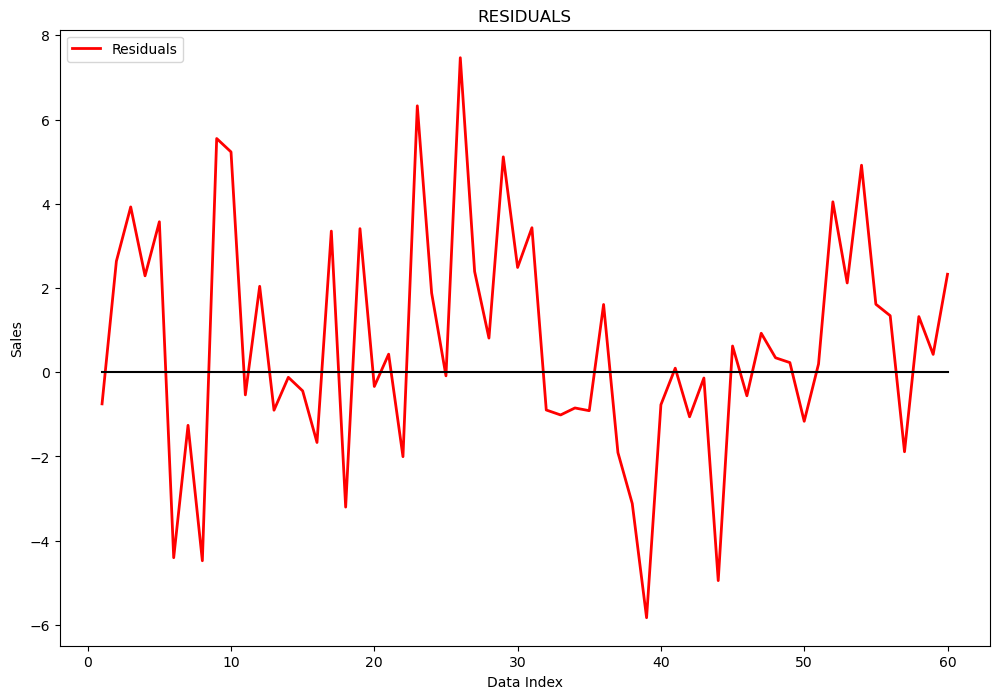

In [72]:
indexler = range (1,61)

#residuls 
fig, ax = plt.subplots(figsize= (12,8))
ax.plot (indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

#zero line
ax.plot (indexler, np.zeros (60), color='black')

plt.title( 'RESIDUALS')
plt.xlabel ('Data Index')
plt.ylabel('Sales')
plt.legend (loc='upper left')
plt.show()

In [83]:
#RMSE and Rsquare

from sklearn.metrics import r2_score,mean_squared_error
import math

r2 = r2_score(y_test,y_pred)
print(f'R Square = %{r2*100}')

mse = mean_squared_error(y_test,y_pred)
print(f'MSE = {mse}')

rmse = math.sqrt(mse)
print(f'RMSE = {rmse}')

R Square = %59.42987267783302
MSE = 7.97579853285485
RMSE = 2.8241456288327007
